### Importanto as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("../dados/Nike_Sales_Uncleaned.csv")

### Cabeçalho da planilha

In [6]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [7]:
df.columns

Index(['Order_ID', 'Gender_Category', 'Product_Line', 'Product_Name', 'Size',
       'Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Order_Date',
       'Sales_Channel', 'Region', 'Profit'],
      dtype='object')

In [8]:
df.shape

(2500, 13)

### Tratando os dados vazios e conferindo tipos de dados

In [16]:
df = df.drop_duplicates()

df = df.fillna(0)

print(df.dtypes)


Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object


### Converter datas (se tiver colunas de data)
### Conferir estatísticas gerais

In [18]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
print(df.describe())

          Order_ID   Units_Sold          MRP  Discount_Applied       Revenue  \
count  2500.000000  2500.000000  2500.000000       2500.000000   2500.000000   
mean   3194.352400     0.750000  3010.267916          0.210004    274.873716   
min    2000.000000    -1.000000     0.000000          0.000000  -7561.590000   
25%    2534.750000     0.000000     0.000000          0.000000      0.000000   
50%    3192.500000     0.000000     0.000000          0.000000      0.000000   
75%    3841.250000     2.000000  6099.907500          0.320000      0.000000   
max    4499.000000     4.000000  9996.220000          1.250000  37169.350000   
std     749.972638     1.416299  3434.418215          0.364519   2023.773550   

                Order_Date       Profit  
count                  600  2500.000000  
mean   2024-07-26 09:24:00  1376.012848  
min    2023-07-26 00:00:00 -1199.450000  
25%    2024-01-25 00:00:00    93.532500  
50%    2024-08-01 00:00:00  1371.385000  
75%    2025-01-16 06:00:00 

In [28]:
print(df.dtypes)

Order_ID              int64
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Profit              float64
dtype: object


### Analise de receita X regiao

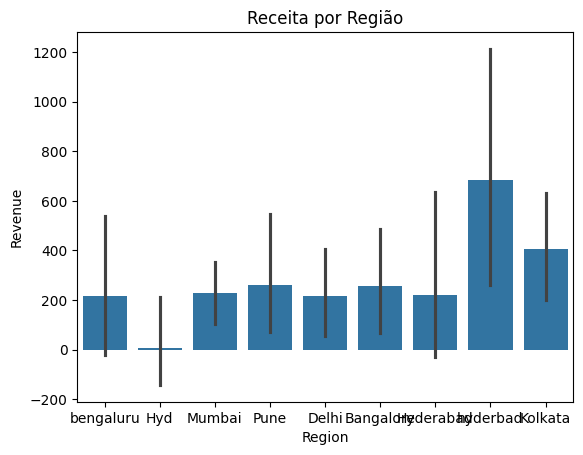

In [19]:

sns.barplot(x='Region', y='Revenue', data=df)
plt.title('Receita por Região')
plt.show()

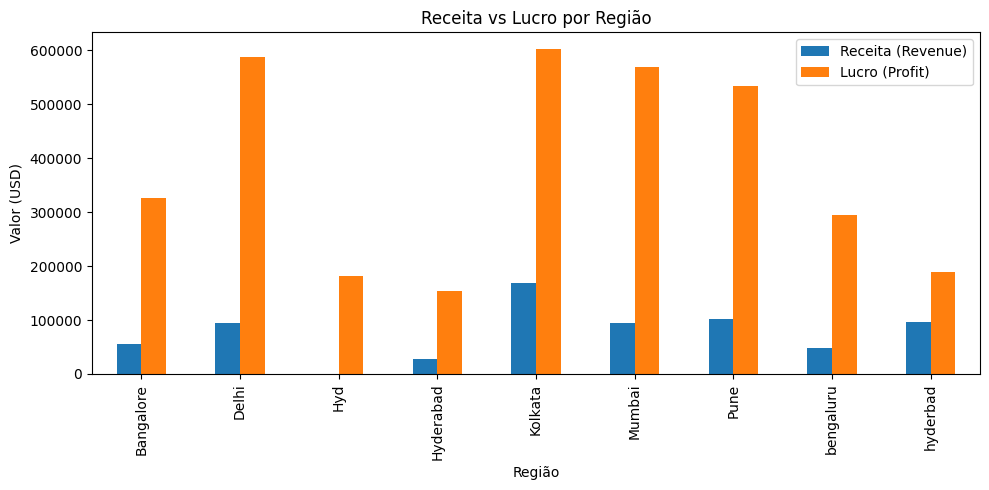

In [20]:
grouped = df.groupby('Region')[['Revenue', 'Profit']].sum().reset_index()

# Plotar
grouped.plot(x='Region', y=['Revenue', 'Profit'], kind='bar', figsize=(10,5))
plt.title('Receita vs Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Valor (USD)')
plt.legend(['Receita (Revenue)', 'Lucro (Profit)'])
plt.tight_layout()
plt.show()

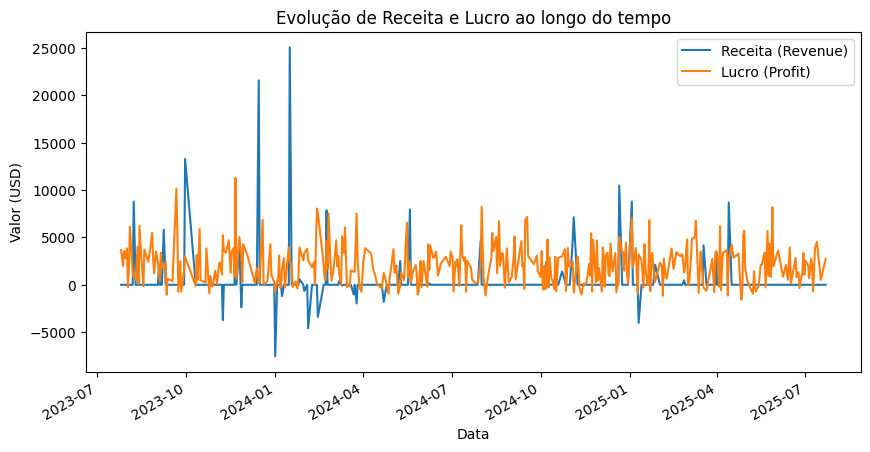

In [21]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

time_data = df.groupby('Order_Date')[['Revenue', 'Profit']].sum()

time_data.plot(figsize=(10,5))
plt.title('Evolução de Receita e Lucro ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor (USD)')
plt.legend(['Receita (Revenue)', 'Lucro (Profit)'])
plt.show()

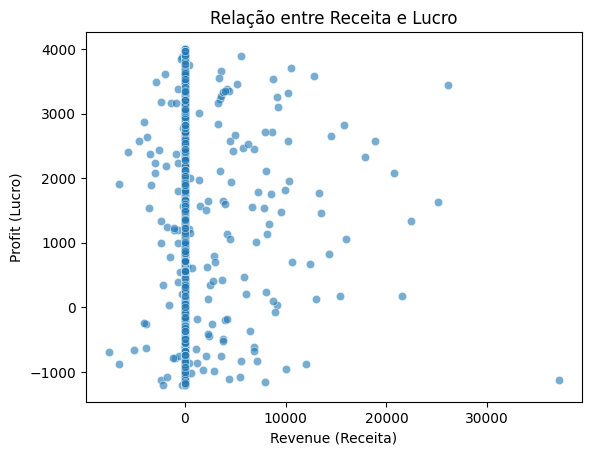

In [24]:
sns.scatterplot(x='Revenue', y='Profit', data=df, alpha=0.6)
plt.title('Relação entre Receita e Lucro')
plt.xlabel('Revenue (Receita)')
plt.ylabel('Profit (Lucro)')
plt.show()

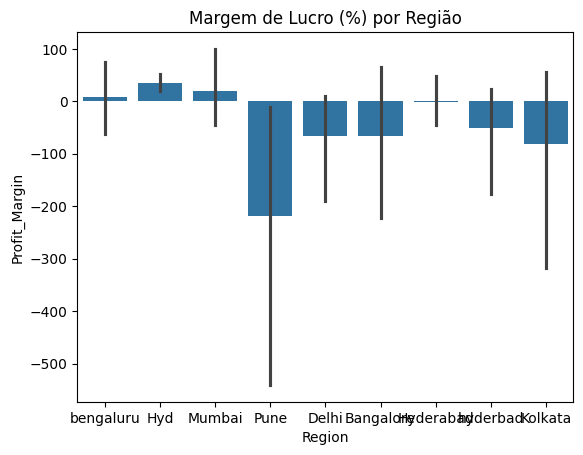

In [25]:
df['Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

sns.barplot(x='Region', y='Profit_Margin', data=df)
plt.title('Margem de Lucro (%) por Região')
plt.show()

| Tipo de gráfico | Mostra o quê                         | Ideal pra                    |
| --------------- | ------------------------------------ | ---------------------------- |
| Barras          | Comparar Receita e Lucro lado a lado | Categorias (região, produto) |
| Linhas          | Evolução no tempo                    | Séries temporais             |
| Dispersão       | Relação entre Receita e Lucro        | Correlação entre variáveis   |
| Margem (%)      | Eficiência do lucro                  | Comparar desempenho          |
